# PROJECT TITLE: THE SE HIGHER EDUCATION BRAIN DRAIN

## SETUP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### IMPORT MAIN DATA SET -- STUDENT ENROLMENTS IN HIGHER EDUCATION 

In [2]:
raw_material = pd.read_csv(
    r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domicilary_Origin_201819.csv'
)

In [3]:
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
0,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
1,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow,NaN
2,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow,NaN
3,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin,NaN
4,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow,NaN


## SECTION 1: 
## THE PROFILE OF HIGHER EDUCATION ENROLMENT IN IRELAND

## 1.1 What Colleges Have the Most Students? 

In [4]:
student_population_colleges = raw_material.groupby ( ["Institute New Combined"]) ["Number of Students"].agg(sum) 

In [5]:
student_population_colleges=student_population_colleges.reset_index()

In [6]:
student_population_colleges

,Institute New Combined,Number of Students
0,Athlone IT,4833
1,Cork IT,11054
2,Dublin City University,15558
3,"Dun Laoghaire Institute of Art, Design and Tec...",2335
4,Dundalk IT,4872
5,Galway-Mayo IT,6651
6,IT Carlow,8136
7,IT Sligo,5256
8,IT Tralee,2805
9,Letterkenny IT,3915


In [7]:
student_population_colleges = student_population_colleges.sort_values("Number of Students", ascending=False)

In [8]:
student_population_colleges

,Institute New Combined,Number of Students
20,University College Dublin,26734
17,Technological University Dublin,26598
19,University College Cork,20978
14,"National University of Ireland, Galway",18670
18,Trinity College Dublin,17139
2,Dublin City University,15558
21,University of Limerick,14431
12,Maynooth University,12611
1,Cork IT,11054
22,Waterford IT,8213


In [9]:
# This needs to be tidied up to remove the index column and change column names
student_population_colleges ["Rank"] = (np.arange(len (student_population_colleges)))+1
student_population_colleges=student_population_colleges.set_index ("Rank")
student_population_colleges=student_population_colleges.rename (columns={"Institute New Combined":"College"})

In [10]:
student_population_colleges

,College,Number of Students
Rank,,
1,University College Dublin,26734
2,Technological University Dublin,26598
3,University College Cork,20978
4,"National University of Ireland, Galway",18670
5,Trinity College Dublin,17139
6,Dublin City University,15558
7,University of Limerick,14431
8,Maynooth University,12611
9,Cork IT,11054


In [11]:
#Create graphic representation 

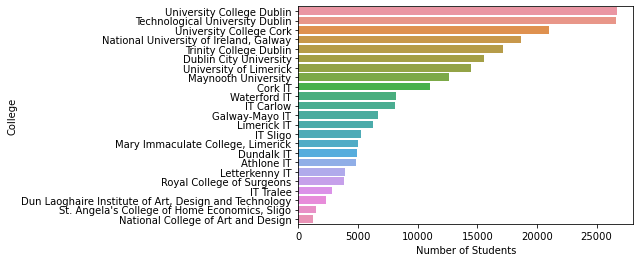

In [12]:
sns.barplot(data=student_population_colleges, y="College", x="Number of Students");

In [78]:
# A second interesting breakdown would be the overall percentage of the total number recruited by each institution 

In [79]:
student_population_colleges ["Percent of Overall"] = student_population_colleges ["Number of Students"]/student_population_colleges ["Number of Students"].sum()

In [80]:
student_population_colleges=student_population_colleges.round(decimals=4) 

In [81]:
student_population_colleges

,College,Number of Students,Percent of Overall
Rank,,,
1,University College Dublin,26734,0.1170
2,Technological University Dublin,26598,0.1164
3,University College Cork,20978,0.0918
4,"National University of Ireland, Galway",18670,0.0817
5,Trinity College Dublin,17139,0.0750
6,Dublin City University,15558,0.0681
7,University of Limerick,14431,0.0632
8,Maynooth University,12611,0.0552
9,Cork IT,11054,0.0484


In [82]:
# Present this in graphic form 

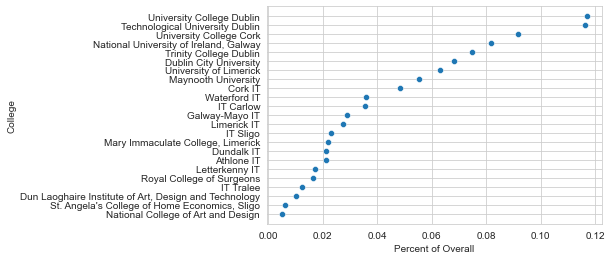

In [83]:
sns.scatterplot(data=student_population_colleges, y="College", x="Percent of Overall");

In [84]:
# Graphic could be more interesting 


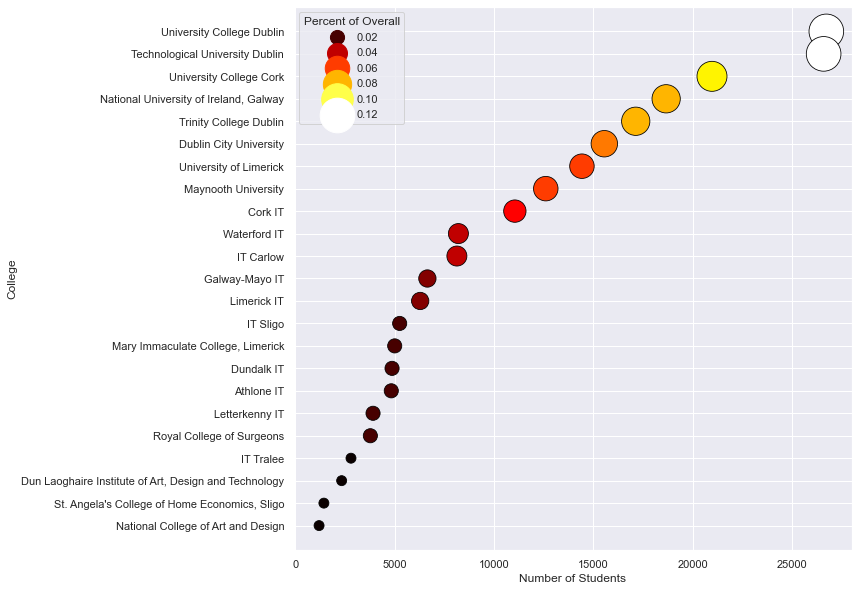

In [118]:
sns.set_style("ticks")
sns.set(rc={"figure.figsize":(10, 10)})
minsize=min(student_population_colleges["Percent of Overall"]*10000)
maxsize=max(student_population_colleges["Percent of Overall"]*10000)
sns.scatterplot(data=student_population_colleges
                , x="Number of Students", y="College"
                , edgecolor = "black"
                , palette="hot"
                , size="Percent of Overall"
                , sizes=(minsize, maxsize)
                , hue="Percent of Overall"
                );

In [87]:
student_population_colleges=student_population_colleges.round(decimals=2)    
student_population_colleges

,College,Number of Students,Percent of Overall
Rank,,,
1,University College Dublin,26734,0.12
2,Technological University Dublin,26598,0.12
3,University College Cork,20978,0.09
4,"National University of Ireland, Galway",18670,0.08
5,Trinity College Dublin,17139,0.08
6,Dublin City University,15558,0.07
7,University of Limerick,14431,0.06
8,Maynooth University,12611,0.06
9,Cork IT,11054,0.05


## 1.2 What it the Most Popular Discipline for Students? 

In [21]:
student_population_course = raw_material.groupby ( ["Isced Discipline"]) ["Number of Students"].agg(sum) 
student_population_course = pd.DataFrame(student_population_course)

In [22]:
student_population_course =student_population_course.sort_values("Number of Students", ascending=False)

In [23]:
student_population_course [0:20].reset_index()

,Isced Discipline,Number of Students
0,(0410) Business and administration not further...,17186
1,(0210) Arts not further defined or elsewhere c...,12377
2,(0413) Management and administration,12265
3,(0913) Nursing and midwifery,10385
4,(0912) Medicine,8460
5,(0610) Information and Communication Technolog...,6552
6,(0421) Law,6500
7,(0510) Biological and related sciences not fur...,6350
8,(0613) Software and applications development a...,5630
9,(0710) Engineering and engineering trades not ...,5122


### 1.3 What County Sends the Most Students to College? 

In [24]:
student_population_county = raw_material.groupby ("County") ["Number of Students"].agg(sum)
student_population_county = pd.DataFrame(student_population_county)
student_population_county=student_population_county.reset_index()

In [25]:
student_population_county

,County,Number of Students
0,Antrim (including Belfast),396
1,Armagh,100
2,Carlow,2763
3,Cavan,2870
4,Clare,5746
5,Cork,25397
6,Derry,255
7,Donegal,6420
8,Down,399
9,Dublin (including postal districts),49026


In [26]:
# Sort out Dublin and Antrim
student_population_county = student_population_county.replace(student_population_county ["County"] [9], "Dublin")
student_population_county

,County,Number of Students
0,Antrim (including Belfast),396
1,Armagh,100
2,Carlow,2763
3,Cavan,2870
4,Clare,5746
5,Cork,25397
6,Derry,255
7,Donegal,6420
8,Down,399
9,Dublin,49026


In [27]:
student_population_county = student_population_county.replace(student_population_county ["County"] [0], "Antrim")
student_population_county

,County,Number of Students
0,Antrim,396
1,Armagh,100
2,Carlow,2763
3,Cavan,2870
4,Clare,5746
5,Cork,25397
6,Derry,255
7,Donegal,6420
8,Down,399
9,Dublin,49026


In [28]:
# Sort and show graphic

In [29]:
student_population_county = student_population_county.sort_values("Number of Students", ascending=False)

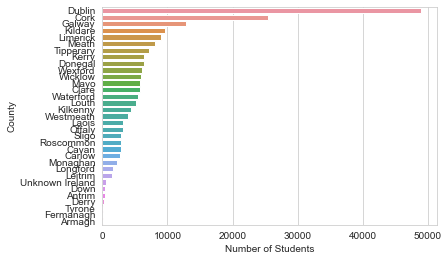

In [30]:
sns.barplot(data=student_population_county, y="County", x="Number of Students");

In [31]:
student_population_county

,County,Number of Students
9,Dublin,49026
5,Cork,25397
11,Galway,12808
13,Kildare,9676
17,Limerick,8975
21,Meath,8125
26,Tipperary,7109
12,Kerry,6452
7,Donegal,6420
31,Wexford,6149


In [32]:
# Unsurprisingly, the county sending most students to higher college is Dublin, followed by the Cork and Galway. 
# A more meaningful measure of relative participation would be the proportion of the overall population 
# attending higher education. See Section 2 below

### 1.2.1 Import and Clean Data on County Populations 

#### Scrape data 

In [33]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [34]:
print(len(scraped_data))

2


In [35]:
County_Populations=scraped_data[0]

In [36]:
County_Populations.head()

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→


#### Only include most recent census information (2016)

In [37]:
County_Populations2016=County_Populations.drop(
    ["PopulationCensus1991-04-21", "PopulationCensus1996-04-28", "PopulationCensus2002-04-28", "PopulationCensus2006-04-23", "PopulationCensus2011-04-10", "Unnamed: 8"],
    axis=1)

In [38]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24
0,Carlow,County,56932
1,Cavan,County,76176
2,Clare,County,118817
3,Cork,County,333213
4,Cork City,City,209655
5,Donegal,County,159192
6,Dublin City,City,554554
7,Dún Laoghaire-Rathdown,County,218018
8,Fingal,County,296020
9,Galway,County,179390


#### Tidy up Dublin, Cork and Galway populations 

In [39]:
def TidyCountyPop(County_Populations2016): 
    if County_Populations2016 ["Name"] in ["Fingal", "Dublin City", "Dún Laoghaire-Rathdown", "South Dublin"]:
        return "Dublin"
    elif County_Populations2016 ["Name"] in ["Cork City"]:
        return "Cork"
    elif County_Populations2016 ["Name"] in ["Galway City"]:
        return "Galway"
    elif County_Populations2016 ["Name"] in ["Laois (Laoighis)"]:
        return "Laois"
    else:
        return County_Populations2016 ["Name"]


In [40]:
County_Populations2016["New Name"]=County_Populations2016.apply (TidyCountyPop, axis=1)
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
9,Galway,County,179390,Galway


In [41]:
County_Populations2016 = County_Populations2016.sort_values("New Name")

In [42]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
25,South Dublin,County,278767,Dublin


In [43]:
County_Populations2016=County_Populations2016.groupby("New Name").sum(["Dublin", "Cork", "Galway"]).reset_index()

In [44]:
# Final Tidy Up
County_Populations2016.columns=["County", "Population_2016"]
County_Populations2016 = County_Populations2016.sort_values("Population_2016", ascending=False)
County_Populations2016 = County_Populations2016.drop(7)

In [45]:
 County_Populations2016# Final table of county populations 2016 in order of size

,County,Population_2016
5,Dublin,1347359
3,Cork,542868
6,Galway,258058
9,Kildare,222504
17,Meath,195044
13,Limerick,194899
22,Tipperary,159553
4,Donegal,159192
25,Wexford,149722
8,Kerry,147707


### Merge County and Student Population Information to get a Patricipation Rate 

In [46]:
merged_population_counties = student_population_county.merge (County_Populations2016, on="County", how="right")

In [47]:
merged_population_counties 

,County,Number of Students,Population_2016
0,Dublin,49026,1347359
1,Cork,25397,542868
2,Galway,12808,258058
3,Kildare,9676,222504
4,Meath,8125,195044
5,Limerick,8975,194899
6,Tipperary,7109,159553
7,Donegal,6420,159192
8,Wexford,6149,149722
9,Kerry,6452,147707


In [48]:
merged_population_counties ["Percentage Attending Third Level"] = merged_population_counties ["Population_2016"]/ merged_population_counties ["Number of Students"]

In [49]:
merged_population_counties=merged_population_counties.round(decimals=2)

In [50]:
print(merged_population_counties["Percentage Attending Third Level"].mean())

23.45038461538462


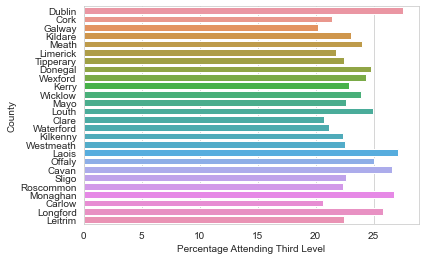

In [51]:
sns.barplot(
    data=merged_population_counties, 
    y="County", 
    x="Percentage Attending Third Level",
      );

In [52]:
participation_by_county=merged_population_counties.pivot_table(values="Percentage Attending Third Level", index="County")
participation_by_county.sort_values("Percentage Attending Third Level", ascending=False)

,Percentage Attending Third Level
County,
Dublin,27.48
Laois,27.09
Monaghan,26.75
Cavan,26.54
Longford,25.79
Offaly,25.03
Louth,24.97
Donegal,24.80
Wexford,24.35


<AxesSubplot:xlabel='County'>

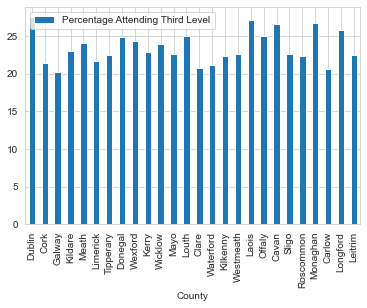

In [53]:
merged_population_counties.plot(x="County", y="Percentage Attending Third Level", kind="bar")

In [54]:
# This suggests that there is reasonable uniformity across the counties on the percentage of the population currently in higher education. 
# The percentage varies between 20% and 27%. 
#
# The limitations of the methodology need to be pointed out. 

In [55]:
#

## SECTION 2: 
## WHAT AND WHERE DO STUDENTS FROM THE SOUTH EAST GO TO COLLEGE? 
    

### 2.1 Slice raw material table to generate table only of students from the counties of the South East 

In [56]:
SE_counties=["Carlow", "Kilkenny", "Waterford", "Wexford"]

In [57]:
SE_counties_enrolment=raw_material [raw_material["County"].isin(SE_counties)]

In [58]:
SE_counties_enrolment.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
1237,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,IT Carlow,Carlow
1238,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,"St. Angela's College of Home Economics, Sligo",Carlow
1239,2,2018/2019,Ireland,(0011) Basic programmes and qualifications,Trinity College Dublin,Carlow
1240,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,University College Dublin,Carlow
1241,1,2018/2019,Ireland,(0110) Education not further defined or elsewh...,Dublin City University,Carlow


#### Show a table with the totals for each county in the region and the total enrolment 

In [59]:
SE_overall_enrol = SE_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
SE_overall_enrol.loc["Total"] = SE_overall_enrol.sum()
SE_overall_enrol=SE_overall_enrol.reset_index()
SE_overall_enrol

,County,Number of Students
0,Carlow,2763
1,Kilkenny,4443
2,Waterford,5490
3,Wexford,6149
4,Total,18845


#### Create Some Comparators: the South West, and the Mid West

In [60]:
SW_counties = ["Kerry", "Cork"] # NUTS3 South West Region of Ireland 
MW_counties = ["Clare", "Tipperary", "Limerick"] # NUTS3 Mid West Region of Ireland 

In [61]:
MW_counties_table = raw_material [raw_material["County"].isin(MW_counties)]
SW_counties_table = raw_material [raw_material["County"].isin(SW_counties)]
SW_total=SW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total=MW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total

NameError: name 'SW_counties_total' is not defined

In [ ]:
SW_total=SW_counties_enrolment ["Number of Students"].sum()
MW_total=MW_counties_enrolment ["Number of Students"].sum()
SE_total=SE_counties_enrolment ["Number of Students"].sum()

In [ ]:
Comparator_data ={"Region": ["South West", "Mid West", "South East"], "Enrolment": [SW_total,  MW_total, SE_total]}
pd.DataFrame(Comparator_data)

#### Add in percentage of overall national enrolment 

In [ ]:
Comparator_data ["Percent Overall National"]=Comparator_data ["Enrolment"]/(raw_material ["Number of Students"].sum())

In [ ]:
Comparator_data=pd.DataFrame(Comparator_data)

In [ ]:
print(Comparator_data.set_index("Region"))

In [ ]:
Comparator_data.plot(x="Region", y="Percent Overall National", kind="bar", color="orange")

#### Calculate regional population as % of overall national population 

In [ ]:
MW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(MW_counties)]
SW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SW_counties)]
SE_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SE_counties)]

In [ ]:
Comparator_data ["Population Census 2016"] = ([
    SW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    MW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    SE_counties_population ["PopulationCensus2016-04-24"].sum()
])
Comparator_data

In [ ]:
Comparator_data ["Percent National Population"] = Comparator_data ["Population Census 2016"]/County_Populations2016 ["PopulationCensus2016-04-24"].sum()
Comparator_data

In [ ]:
# Interesting. SW has 7% of national population but 14% of her students. 
# SE has 4% national population and 8% of her students.

In [ ]:
SE_students_discipline = SE_counties_enrolment.groupby("Isced Discipline") ["Number of Students"].sum()
SE_students_discipline = SE_students_discipline.sort_values(ascending=False)
SE_students_discipline

In [ ]:
SE_student_population=isolateSE2.groupby ("County").sum().reset_index()

In [ ]:
raw_material_ind=raw_material.set_index ("County")

In [ ]:
isolateSE1=raw_material_ind.loc[ ["Waterford", "Wexford", "Carlow", "Kilkenny"]]

In [ ]:
isolateSE2=isolateSE1.sort_values("Institute New Combined")

In [ ]:
isolateSE2.head()

In [ ]:
print(SE_student_population) #This is the number of students from each County in the SE attending Higher Education 

In [ ]:
raw_material_ind.sort_index()

In [ ]:
raw_material_ind.sort_index(level=["County", "Number of Students"])

In [ ]:
WD_student.head()

In [ ]:
WD_student2=WD_student.groupby (["Institute New Combined"]) ["Number of Students"]. sum()
WD_student2.plot (kind="bar", rot=90)
plt.show()

In [ ]:
WD_student3=WD_student.sort_values("Institute New Combined")
WD_student_excludeWIT=WD_student3[~WD_student3 ["Institute New Combined"].isin("Waterford IT")]


In [ ]:
raw_material.head()

In [ ]:
raw_material_ind=raw_material.set_index("County")

In [ ]:
raw_material_ind.head()

In [ ]:
raw_material_ind.isna()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material.isna().any()

In [ ]:
raw_material_ind.reset_index()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material_ind.sort_values("Number of Students", ascending=False)

In [ ]:
raw_material_ind.sort_values("County", ascending=True)

raw_material_ind.groupby("Institute New Combined) ["Number of Students"]. sum()

In [ ]:
most_populace_colleges=raw_material_ind.groupby("Institute New Combined") ["Number of Students"].sum()

In [ ]:
most_populace_colleges.head()

In [ ]:
most_populace_colleges.hist()

In [ ]:
most_populace_colleges.plot(x="Institute New Combined", kind="bar", rot=90)

In [ ]:
most_populace_colleges.head()

In [ ]:
SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])

In [ ]:
SE_counties_students = (raw_material ["County"]==["Carlow"])